In [1]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import gc
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from IPython.lib.display import Audio
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_curve,
)
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, TensorBoard
from tensorflow.keras.layers import (
    LSTM,
    Activation,
    BatchNormalization,
    Bidirectional,
    Conv1D,
    Dense,
    Dropout,
    Flatten,
    Input,
    MaxPool1D,
)

2024-05-21 05:27:42.763435: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-21 05:27:42.790260: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 05:27:42.790287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 05:27:42.790851: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-21 05:27:42.795025: I tensorflow/core/platform/cpu_feature_guar

In [3]:
gpus = tf.config.list_physical_devices("GPU")
print(gpus)
tf.config.set_logical_device_configuration(
    gpus[0],
    [tf.config.LogicalDeviceConfiguration(memory_limit=8000)],
)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-05-21 05:27:44.494113: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 05:27:44.519258: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 05:27:44.519451: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
emotion_list = {
    0: "neutral",
    1: "calm",
    2: "happy",
    3: "sad",
    4: "angry",
    5: "fearful",
    6: "disgusted",
    7: "surprised",
}

In [5]:
def plot_network_history(network_history):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    axes[0].plot(network_history.history["loss"], label="Training Loss")
    axes[0].plot(network_history.history["val_loss"], label="Validation Loss")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss")
    axes[0].legend()

    axes[1].plot(
        network_history.history["categorical_accuracy"],
        label="Training Categorical Accuracy",
    )
    axes[1].plot(
        network_history.history["val_categorical_accuracy"],
        label="Validation Categorical Accuracy",
    )
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy")
    axes[1].legend()
    plt.show()

In [6]:
log_dir = "runs/pure_lstm_bidirect_og_data"
with open("./data/processed_data.pickle", "rb") as f:
    data = pickle.load(f)
X_train = data["X_train"]
X_test = data["X_test"]
Y_train = data["Y_train"]
Y_test = data["Y_test"]

In [7]:
X_train.shape

(12000, 40, 1)

In [8]:
print(gc.collect())
K.clear_session()

num_classes = len(Y_test[0])
model = Sequential()

layers = [
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(1024, return_sequences=True)),
    Bidirectional(LSTM(1024)),
    # LSTM(1024),
    Dense(num_classes, activation="softmax"),
]

model = tf.keras.Sequential(layers)
model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["categorical_accuracy"]
)

model.summary()

2024-05-21 05:27:44.717377: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


0


2024-05-21 05:27:44.717626: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 05:27:44.717761: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 05:27:44.765849: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 40, 2048)          8404992   
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 2048)              25174016  
 onal)                                                           
                                                                 
 dense (Dense)               (None, 8)                 16392     
                                                                 
Total params: 33595400 (128.16 MB)
Trainable params: 33595400 (128.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
es = keras.callbacks.EarlyStopping(
    monitor="val_categorical_accuracy",
    min_delta=0.00005,
    patience=15,
    restore_best_weights=True,
)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor="val_categorical_accuracy",
    factor=0.3,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)
tensorboard_callback = TensorBoard(log_dir=log_dir, update_freq="epoch")

network_history = model.fit(
    X_train,
    Y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[
        es,
        lr_scheduler,
        tensorboard_callback,
    ],
)

Epoch 1/100


2024-05-21 05:27:52.861991: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-05-21 05:27:52.960957: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f381a4d8fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-21 05:27:52.960990: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-05-21 05:27:52.964702: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1716262073.019002   12965 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 [==============================] - 16s 87ms/step - loss: 1.8464 - categorical_accuracy: 0.2811 - val_loss: 1.6824 - val_categorical_accuracy: 0.3542 - lr: 0.0010
Epoch 2/100
150/150 [==============================] - 12s 81ms/step - loss: 1.5604 - categorical_accuracy: 0.4117 - val_loss: 1.4732 - val_categorical_accuracy: 0.4479 - lr: 0.0010
Epoch 3/100
150/150 [==============================] - 12s 81ms/step - loss: 1.3763 - categorical_accuracy: 0.4820 - val_loss: 1.3067 - val_categorical_accuracy: 0.5175 - lr: 0.0010
Epoch 4/100
150/150 [==============================] - 12s 81ms/step - loss: 1.2048 - categorical_accuracy: 0.5540 - val_loss: 1.2537 - val_categorical_accuracy: 0.5138 - lr: 0.0010
Epoch 5/100
150/150 [==============================] - 12s 81ms/step - loss: 1.0118 - categorical_accuracy: 0.6248 - val_loss: 1.0702 - val_categorical_accuracy: 0.6033 - lr: 0.0010
Epoch 6/100
150/150 [==============================] - 12s 81ms/step - loss: 0.8113 - categorical_accu

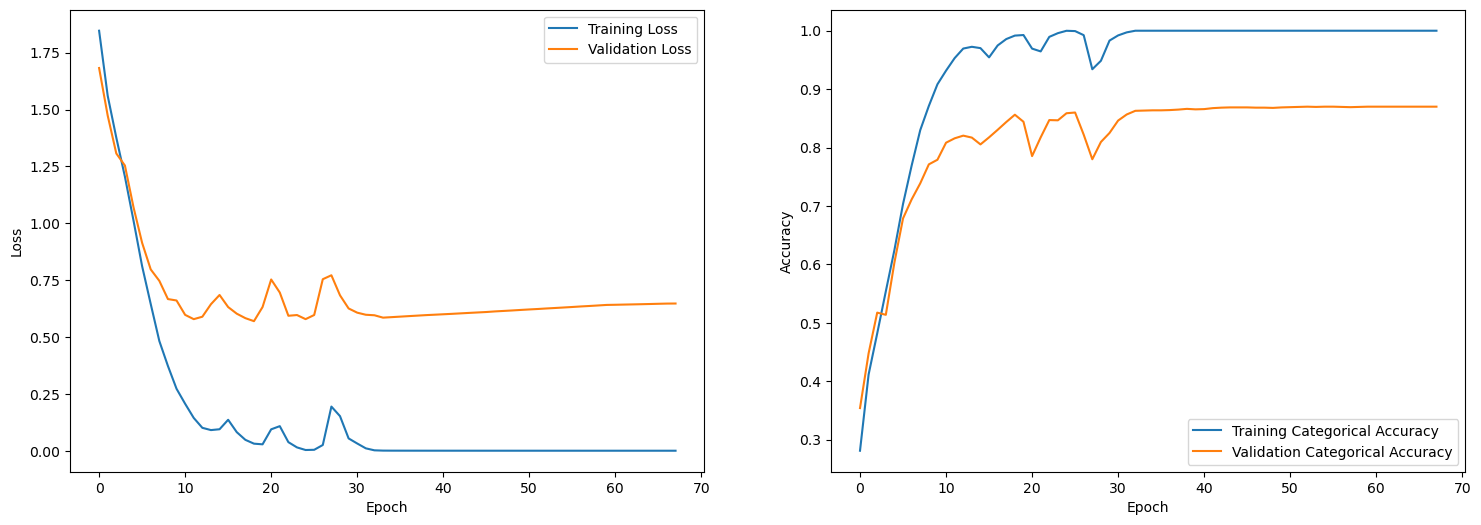

In [10]:
plot_network_history(network_history)

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
preds = model.predict(X_test)

9/9 [==============================] - 1s 17ms/step


In [12]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, 1)
y_true = np.argmax(Y_test, 1)

print("Test accuracy: %g" % (accuracy_score(y_true, y_pred)))
print("Precision", precision_score(y_true, y_pred, average="macro"))
print("Recall", recall_score(y_true, y_pred, average="macro"))
print("f1_score", f1_score(y_true, y_pred, average="macro"))

9/9 [==============================] - 0s 18ms/step
Test accuracy: 0.701389
Precision 0.7137938010270327
Recall 0.7006839137459611
f1_score 0.7041480074120734


In [13]:
print(
    classification_report(y_true, y_pred, target_names=emotion_list.values(), digits=4)
)

              precision    recall  f1-score   support

     neutral     0.8667    0.6842    0.7647        19
        calm     0.7955    0.8537    0.8235        41
       happy     0.5952    0.6944    0.6410        36
         sad     0.6136    0.6923    0.6506        39
       angry     0.7838    0.7838    0.7838        37
     fearful     0.6364    0.6562    0.6462        32
   disgusted     0.6875    0.6286    0.6567        35
   surprised     0.7317    0.6122    0.6667        49

    accuracy                         0.7014       288
   macro avg     0.7138    0.7007    0.7041       288
weighted avg     0.7074    0.7014    0.7016       288



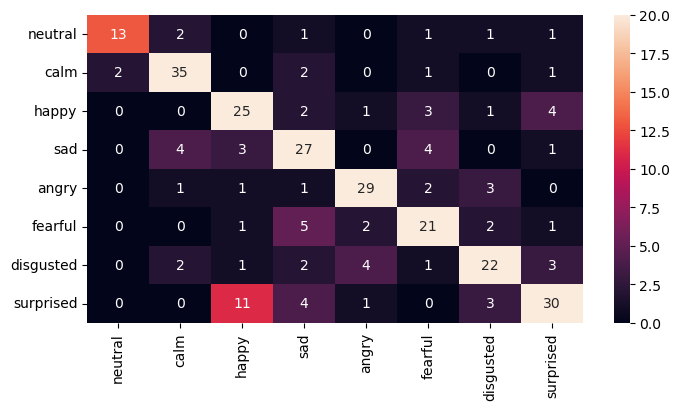

In [14]:
plt.figure(figsize=(8, 4))
conf = confusion_matrix(y_true, y_pred)
labels = emotion_list.values()
sns.heatmap(conf, annot=True, fmt="d", vmax=20, xticklabels=labels, yticklabels=labels)
plt.show()

In [18]:
model.save(f"./models/{log_dir.split('/')[-1]}.keras")